
# Procesamiento de Texto 101
En este laboratorio nos encontraremos por primera vez con textos que deberán ser tratados de manera especial a como hemos tratado al resto de variables. Si pensamos por un momento en un texto como atributo probablemente nos sea dificil categorizarlo como alguno de los tipos de datos que hemos visto hasta ahora en clases, ¿es un texto realmente una variable categorica ordinal o nominal? y una imágen?.

En realidad para poder entender lo que debemos hacer con este tipo de datos es representarlo mediante algo llamado "Descriptor de contenido", los descriptores de contenido son un área ampliamente estudiada en varias áreas como la recuperación de información. La forma en la que debemos aproximarnos a esta información es mediante la resolución primero del problema de representar la información (texto o imágen) de una manera numérica que caracterice el contenido del dato, en el caso de una imágen, por ejemplo, podríamos generar una representación de las distintas texturas ocurrentes en las distintas secciones de la imagen, en el caso de un texto podríamos querer representar cosas como el tópico del mismo, la sentimentalidad de cada oración, el estilo de redacción o, más simplemente, las palabras o fraces que ocurren en el texto.

Para este laboratorio utilizaremos un descriptor de texto simple y propenso a varias fallas y debilidades pero efectivo en muchos casos:

## Bolsa de Palabras
Un descriptor de tipo bolsa de palabras representa un texto mediante la generación de multiples columnas numéricas donde cada columna representa la ocurrencia (binaria o mediante un conteo de frecuencia de ocurrencia) de una palabra en el determinado texto como en la siguiente imágen:

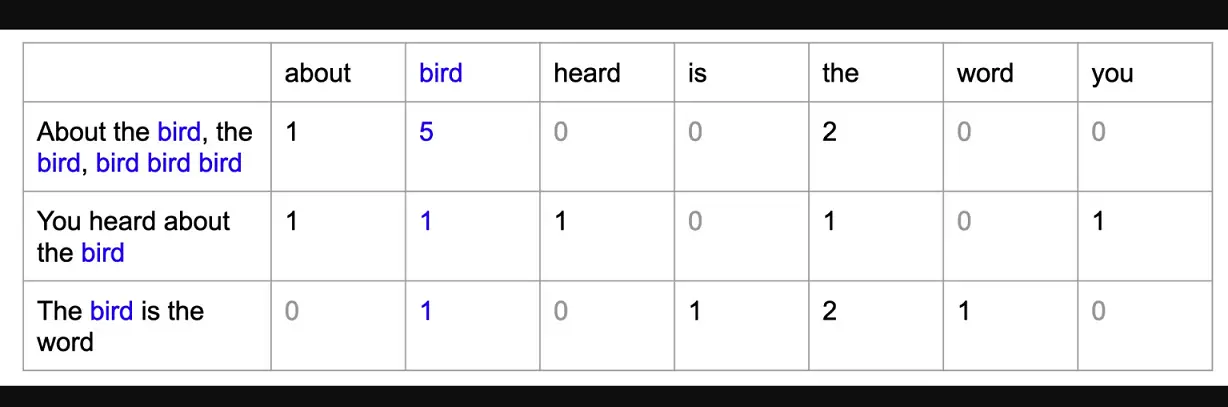

(fuente imagen: https://vitalflux.com/text-classification-bag-of-words-model-python-sklearn/)

Notar que en este caso la matriz final en efecto logra representar el texto mediante una matriz de conteos de ocurrencias. __El objeto en sklearn que permite generar esta representación se llama `CountVectorizer`, estudielo para poder resolver este laboratorio.__

## StopWords
Las _"stopwords"_ son palabras con baja carga semántica, consideremos por ejemplo el segundo texto:

_You heard about the bird_

si substraemos la palabra _"the"_ entonces notaremos que el significado sigue entendiendose bastante bien, puede que no sea correcta gramaticalmente hablando pero somos capaces de inferir el mismo significado, sin embargo, si eliminamos la palabra _"bird"_ entonces nos es imposible deducir el significado original, eso es por que la palabra _"bird"_ tiene una carga semántica mayor en el contexto de la oración. La palabra _"The"_ en general se considera una stopword porque es un conector de igual manera que la _"y"_ en el castellano, asi como esta palabras existen múltiples stopwords específicas obviamente al lenguaje y al dominio del texto ("y" en un libro de matemática puede referirse a una variable por lo que puede ser importante en ciertas oraciones). A pesar de lo difícil que es generar listas de stopwords las librerías como scikit-learn y nltk proveen algunas listas básicas.

__Lo que queremos es reducir la cantidad de stopwords presentes en nuestra representación de manera de no estar representando cosas con baja carga semántica.__

Para finalizar y como dato curioso (aunque bastante importante dentro de lo que es procesamiento de lenguaje natural) existe algo llamado Ley de Zipf que indica que la frecuencia de ocurrencia de palabras en un texto y la cantidad de palabras con dicha frecuencia sigue una ley de potencia, sin ir más lejos, esta es dicha gráfica para la frecuencia de palabras vs cantidad de palabras con dicha frecuencia para los comentarios del dataset de Reddit con el que trabajaremos:

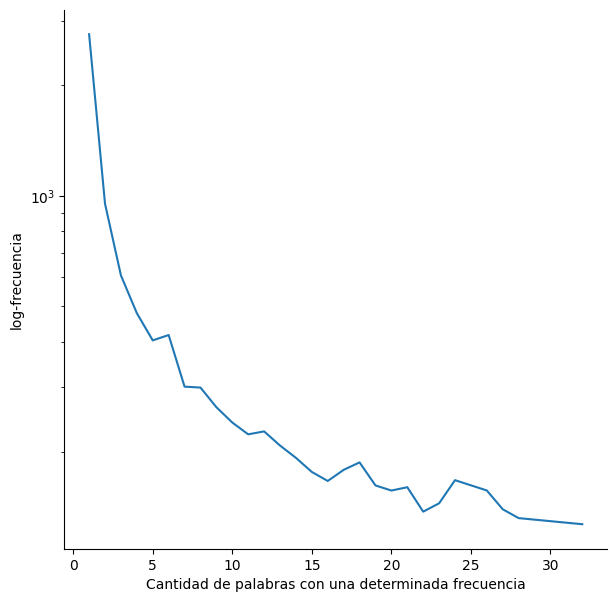

Dato curioso: __Todos__ los lenguajes naturales (idiomas) generados por el ser humano, sobre todo los occidentales, siguen este patrón.

### n-gramas
En el ejemplo anterior cada columna representa una palabra ocurrente en el texto, en este caso se dice que el _token_ es a nivel de palabra, sin embargo, podemos hacer tokens a nivel de oraciones, por ejemplo la frase _Thank You_ tiene un signficado completo como oración y no simplemente por ser la conjunción de dos palabras.

Los n-gramas es la generación de tokens usando conjuntos de palabras que aparecen de manera secuencial en el texto, por ejemplo, en el texto _You heard about the bird_ podemos generar los 2-gramas: (you heard, heard about, about the, the bird).


Estudie cómo el método `CountVectorizer` le permite utilizar estas técnicas para representar de mejor manera el texto, finalmente, puesto que es fácil generar representaciones demasiado grandes al hacer bolsas de palabras, utilice el parámetro max_features para acotar la cantidad de atributos que se extraen, le servirá también estudiar que hacen los atributos `min_df` y `max_df`.



# Laboratorio 2 - Clasificación y Regresión

En este laboratorio trabajaremos con algoritmos de clasificación sobre 3 datasets:

1. __Reddit Comment Data:__ Este dataset contiene información sobre post y comentarios en los subreddits de machine learning, data science e inteligencia artificial. Lo puede encontrar en el siguiente [link](https://www.kaggle.com/datasets/tushar5harma/topredditcomments)
2. __Google Play Store (Cleaned):__ Este es una versión de un dataset de aplicaciones en la tienda de Google limpiada y preprocesada por un usuario de Kaggle. Puede encontrar el dataset en el siguiente [link](https://www.kaggle.com/datasets/yash16jr/google-play-store-cleaned)
3. __WikiHow:__ Este dataset consiste en atributos para cerca de 20k artículos de WikiHow, si bien el problema principal es de regresión nosotros lo discretizaremos para trabajarlo como un problema de clasificación. Puede encontrar el dataset en el siguiente [link](https://www.kaggle.com/datasets/aniketsharma00411/wikihow-features)



# Preguntas




### 1. Debilidades de Bolsa de Palabras
#### Mencione al menos 2 debilidades o falencias del descriptor de bolsa de palabras y cómo cree usted que pueden ser solucionadas o compensadas. (10 pts.)

El descriptor de bolsa de palabras es utiliado para representar documentos de texto en formato numérico. Aunque es una técnica muy util y ampliamente utilizado, presenta algunas debilidades.

1. **Pérdida de información semántica**: El descriptor considera cada palabra del texto de forma independiente, sin tener en cuenta el contexto en el que aparecen. Esto puede conducir a una pérdida de información semántica importante.

2. **Sensibilidad al tamaño del vocabulario**: Si el tamaño del vocabulario es muy grande, por ejemplo utilizando n-gramas, el descriptor de bolsa de palabras resulta enorme, obteniendo una matriz de características que consume mucha memoria, aumentando la complejidad del modelo y afectando la capacidad de generalizar.

Para solucionar estas debilidades, se pueden utilizar técnicas alternativas como:

1. **Modelos de representación de palabras**: Son aquellos que, como Word2Vec o GloVe, representan cada palabra en un espacio semántico continuo, lo que permite capturar información semántica y contextual. Estos modelos pueden ser utilizados en combinación con el modelo de bolsa de palabras para mejorar la calidad de la representación numérica.

2. **Selección de características**: Para evitar la sensibilidad al tamaño del vocabulario, se pueden hacer dos cosas. 

 2.1: **Selección basada en frecuencia**: Utilizando funciones como `count_vectorizer`, podemos limitar la frecuencia mínima con la que aparecen las palabras, para filtrar aquellas que puedan ser muy específicas y no carguen con información semánticamente importante, al igual que con las palabras con alta frecuencia de aparición, como lo son las stop-words.

 2.2: **Stop-words**: sklearn cuenta con una librería con todas las palabras por idioma, con las stopwords clasificadas. Así podemos aplicar una función que elimine estas palabras de nuestro corpus. En caso de contar con un contexto específico, dentro del cual se repiten ciertas palabras, se pueden incluir aquellas que se quieran excluir del análisis.


### 2. Para cada dataset indique a qué tipo de problema de clasificación corresponde. (5 pts.)


Existen varios tipos de problemas de clasificacion, que se diferencian por la forma en que se establecen las clases y por la naturaleza de la variable que se desea predecir. Algunos de los tipos más comunes son los siguientes:
1. **Binario:** se trata de un problema donde se deben clasificar las instancias en dos categorías mutuamente excluyentes, por ejemplo, si o no.
2. **Multiclase:** se clasifican las instancias en más de dos categorías mutuamente excluyentes. Por ejemplo, predecir el color de una prenda.
3. **Multietiqueta:** A diferencia de la multiclase, en esta clasificación las instancias pueden tener múltiples etiquetas o categorías. Por ejemplo, predecir las etiquetas que describen el contenido de un artículo.
4. **Ordinal:** las etiquetas se ordenan jerárquicamente, por ende tienen una relación de orden entre ellas. Por ejemplo, predecir el grado de satisfacción de un cliente con un producto en escala de lickert.

Para los dataset en estudio, en base a lo descrito anteriormente, se describe a qué tipo de clasificacion corresponden


- **Reddit Comment Data** - *subreddit*: 
Al ser una columna que describe los subreddit al cual corresponde cada post, se puede clasificar como una categoría multiclase, ya que un post no puede pertenecer a dos subreddits distintos.

- **Google Play Store** - *Genre*: 
Inicialmente, podría considerarse una categoría multietiqueta, ya que una aplicación o juego puede pertenecer a más de una clasificación simultáneamente, pero después del procesamiento que se pide en el enunciado, la categorización de esta pasa a ser multiclase, obteniendo sólamente una categoría por aplicación.


- **WikiHow** - *percent_helpful (discretizado)*:
Luego de la discretización, la categorización de este vector resulta de tipo binario: 1 en caso de pertenecer al percentil 90 o superior de la escala de "utilidad" del artículo, o 0 en caso contrario.



### 3. OVO (One-Versus-One) y OVA (One-Versus-All) 
####cuál de estas técnicas utiliza cada uno de los algoritmos de clasificación vistos en clases?.(5 pts.)


En clase se revisaron 2 algoritmos:

1. **Algoritmos discriminativos**: Se encarga de separar grupos de una manera determinada, generando separaciones de grupos, de esta manera cuando un objeto debe ser clasificado, lo hace perteneciendo a uno de los grupos definidos por el algoritmo. Es en este tipo de algoritmos donde tiene lugar la tecnica **OVO**(*One Versus One*), debido a que lo que se hace para poder discriminar entre conjuntos de datos, son comparaciones entre las distintas opciones.

2. **Algoritmos generativos**: Realiza calculo de probabilidades de que un objeto pertenezca a un grupo, tomando en consideracion el set de datos que se le entrega originalmente. Su nombre se debe a que genera nuevos puntos, basados en los que se le entregan.Es en este tipo de algoritmos donde tiene lugar la tecnica **OVA**(*One Versus All*), ya que, lo que se quiere responder es si es que el punto pertenece a la clasificacion que se esta analizando, por lo que lo necesario y directo es compararlo con todos.

### 4. ¿Qué implicancias tiene la Ley de Zipf?. (10 pts)


La Ley de Zipf indica que en un lenguaje natural (independiente del idioma), las **palabras mas comunes tienen una alta frecuencia de aparicion**, mientras que **las menos comunes, tienen menor frecuencia**, matematicamente hablando, la frecuencia de aparicion de las palabras en un conjunto de textos, es inversamente proporcional a su ubicacion en el 'ranking' de apariciones



> Es decir, la palabra que esta 2° en el ranking de mas apariciones, aparece la mitad ($\frac{1}{2}$) de veces que lo hace la 1°, mientras que la palabra con el 3° lugar del ranking, aparece una tercera parte ($\frac{1}{3}$) de veces que lo hace la 1°. Por ejemplo, este es un analisis de las palabras en la literatura en ingles:

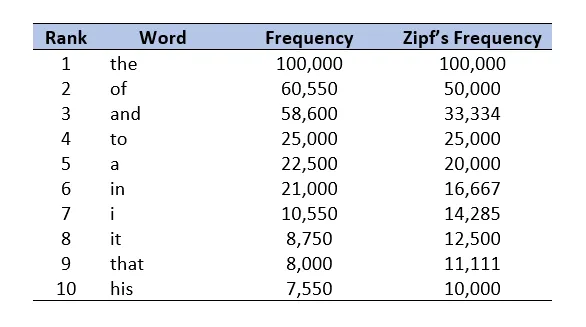

Fuente: [The Principle of Least Effort and Zipf Distribution in Information Retrieval](https://medium.com/geekculture/the-principle-of-least-effort-and-zipf-distribution-in-information-retrieval-a7199d68465f)



La frecuencia de aparicion de palabras, impacta al momento de analizar un texto, debido a que si se toman en cuenta todas **las palabras mas frecuentes**, puede que se esten analizando conectores o sustantivos que **no le suman mayor significancia al texto**, por lo que conviene retirarlas. Por otro lado, si es que se toman en cuenta las **palabras con muy poca frecuencia**, puede que se esten analizando **palabras aisladas y que no tengan mayor correlación con el texto**.

La utilidad de esta ley y su frecuencia haya su utilidad en el modelamiento de lenguaje al ser usado como herramienta en:

1. Reducción de dimensionalidad
2. Analisis de información


# Vectores Objetivo por Dataset
Para las siguientes preguntas considere los siguientes vectores objetivo de cada dataset:
- __Reddit Comment Data:__ El vector objetivo será __subreddit__ (el subreddit al cual pertenece el post). Notar que en este dataset deberá hacer un join entre los dos archivos subidos a Kaggle por la columna `post_id`, se le recomienda investigar el método `merge` de la clase DataFrame de pandas.
- __Google Play Store__ En este dataset deberá predecir la columna `genres`, sin embargo, deberá realizar el siguiente preprocesamiento:
> Esta columna indica multiples categorías para cada aplicación variando desde 1 o más categorías asignadas a cada aplicación, las diferentes caregorías a las que pertenece una aplicación están separadas por el carácter `;`. Procese la columna de manera tal de quedarse con solo la primera categoría para cada aplicación, por ejemplo si la categoría es _"Art & Design;Creativity"_ el vector objetivo final deberá marcar solo _"Art & Design"_.

- __WikiHow:__ Para este dataset deberá realizar un proceso de discretización del vector objetivo original del dataset. El vector objetivo original se llama `percent_helpful` que mide en términos porcentuales el grado de "utilidad" del artículo a los lectores según opiniones de los mismos. Para trabajarlo como un problema de clasificación, genere un vector objetivo que marque con 1 si el artículo corresponde al percentil 90 o superior de utilidad de entre todos los artículos en la base o no (0).

Finalmente, tenga cuidado de no filtrar información al modelo con respecto al vector generado mediante el vector original, es decir, preocupese de eliminar el vector objetivo original cuando haya que generar una nueva versión del mismo y sobre todo inspeccione las columnas presentes en el dataset verificando que no le está entregando al modelo información indirecta sobre el vector objetivo que solo es posible obtener a posteriori (un ejemplo de esto sería por ejemplo si queremos predecir el grado de utilidad de un artículo e incluimos el número de usuarios que marco el artículo como "util" y el número de usuarios que lo marco como "no útil").


Primero definiremos los 3 metodos:

1. **SVM**: Support Vector Machines (Maquinas de soporte vectorial) son un conjunto de algoritmos que permiten separar los conjuntos existentes, de tal manera que cuando se quieran clasificar datos nuevos, sean clasificados dentro de uno de los grupos previamente identificados y caracterizados por algun vector de soporte. 

  Deben su nombre a que usa un conjunto de datos para entrenarse, los cuales son denominados "*Vectores soporte*"*(Support vectors)*

 Se buscara alguna funcion que pueda separar los conjuntos con el mayor margen posible(una distancia mayor nos va a permitir tener una mejor generalización), de modo que la separación entre ambas clases es la maxima. Una vez que se define la separación, se aplica una transformacion que separa ambos conjuntos por una función, esta función se denomina '*kernel*'.

 Este no es muy eficiente cuando la cantidad de datos es muy grande, sin embargo, lo es para dimensiones grandes.






# 5. Problema de Clasificación


Para cada dataset utilice una SVM, un árbol de decisión y una regresión logística para resolver el correspodiente problema de clasificación, en cada caso utilice el método `classification_report` para evaluar sus modelos sobre un conjunto de pruebas y concluya sobre el desempeño de sus modelos en términos de precision, recall y f1-score.(45 pts.)


# Imports

In [69]:
#from google.colab import files
# Basics Data Science
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import re
import string
import time
from pprint import pprint

import nltk
nltk.download('stopwords')
nltk.download('words')
from nltk.corpus import stopwords


# Scikit-Learn Imports
from sklearn.pipeline import Pipeline # Pipeline para serializar pasos
from sklearn.feature_extraction.text import CountVectorizer     # Bolsa de palabras
from sklearn.feature_extraction.text import TfidfTransformer # TF-IDF transformer to change text vector created by count vectorizer
from sklearn.model_selection import train_test_split # Para separar train/test sets

# Models
from sklearn.tree import DecisionTreeClassifier # Para arboles de decision
from sklearn.tree import plot_tree
## Regresion Models
from sklearn.linear_model import LogisticRegression # Regresiones logisticas
from sklearn.linear_model import LinearRegression # Regresiones lineales
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.svm import SVC# Support Vector Machine

from sklearn import linear_model, decomposition, datasets

# Scalers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## Transformers
from sklearn.impute import SimpleImputer
from sklearn.compose import TransformedTargetRegressor

# Metricas y reportes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kroko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Kroko\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [70]:
"""
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!mkdir /content/data
"""

'\nfiles.upload()\n!mkdir ~/.kaggle\n!cp kaggle.json ~/.kaggle/\n!chmod 600 ~/.kaggle/kaggle.json\n!mkdir /content/data\n'

## Reddit

In [71]:
"""
# Descargar datos de Reddit
!kaggle datasets download -d tushar5harma/topredditcomments
!mkdir /content/data/reddit
!unzip /content/topredditcomments.zip -d /content/data/reddit/
"""


'\n# Descargar datos de Reddit\n!kaggle datasets download -d tushar5harma/topredditcomments\n!mkdir /content/data/reddit\n!unzip /content/topredditcomments.zip -d /content/data/reddit/\n'

### Preparar Datos

#### Funciones Auxiliares

In [72]:
# Eliminamos los URL 
def remove_urls(doc):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return re.sub(url_pattern, r'', doc)

# Funcion para eliminar emojis
# Funcion copiada de internet
def remove_emoji(doc):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"          # emoticons
        u"\U0001F300-\U0001F5FF"          # symbols & pictographs
        u"\U0001F680-\U0001F6FF"          # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"          # flags (iOS)
        u"\U00002500-\U00002BEF"          # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"
        u"\u3030"
        "]+", re.UNICODE)
    return emoji_pattern.sub(r'', doc)

stop_words = stopwords.words("english")
words = set(nltk.corpus.words.words())

# Defining a function to clean the data
def clean(doc):
    doc = doc.lower().strip()                                   # Convertimos a minusculas y eliminamos los espacios en blanco
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])          # Quitamos la puntuación y los digitos
    doc = " ".join(w for w in nltk.wordpunct_tokenize(doc) if w in words or not w.isalpha())
    doc = " ".join([token for token in doc.split() if token not in stop_words])                 # Separamos el texto en tokens y removemos las stopwords (Guardamos las que no lo son)
    return doc

def bolsa_de_palabras(x_train, mindf=1, maxdf=1.0, maxfeatures=None):
    print ("mindf: ",mindf, "\t maxdf: ",maxdf)
    vectorizer = CountVectorizer(min_df=mindf, max_df=maxdf, max_features=maxfeatures)
    X = vectorizer.fit_transform(x_train)
    print(X.toarray().shape[1])
    return X

#### Merge de dataset

In [73]:
df_posts = pd.read_csv('./content/data/reddit/Top_Posts.csv') #Se crea el DataFrame de los posts
df_comments=pd.read_csv('./content/data/reddit/Top_Posts_Comments.csv') #Se crea el DataFrame de los comentarios de los posts
merged_reddit=df_posts.merge(df_comments, on='post_id') # Creamos un merge entre los dos DataFrames, segun el ID del post
merged_reddit = merged_reddit[["comment", "subreddit"]]
merged_reddit['comment'] = merged_reddit['comment'].astype('str')
merged_reddit['subreddit'] = merged_reddit['subreddit'].astype('str')
merged_reddit.head() #Vemos como era originalmente

,comment,subreddit
0,Twitter thread: [https://twitter.com/cyrildiag...,MachineLearning
1,The future 🤯,MachineLearning
2,Simple yet very useful. Thank you for sharing ...,MachineLearning
3,"Almost guaranteed, Apple will copy your idea i...",MachineLearning
4,Ohh the nightmare of making this into a stable...,MachineLearning


Limpiamos el dataset de urls, emojis, stop-words y palabras que no estén en ingles con las funciones auxiliares

In [74]:
merged_reddit["comment"] = merged_reddit["comment"].apply(remove_urls)
merged_reddit["comment"] = merged_reddit["comment"].apply(remove_emoji)
merged_reddit["comment"] = merged_reddit["comment"].apply(clean)
merged_reddit.head() #Vemos como es ahora filtrado

,comment,subreddit
0,twitter thread code background removal done al...,MachineLearning
1,future,MachineLearning
2,simple yet useful thank code,MachineLearning
3,almost apple copy idea,MachineLearning
4,nightmare making stable product enough drive m...,MachineLearning


A continuacion, separamos el dataset en entrenamiento y prueba

### Creacion de Datasets a partir de columnas

In [84]:
# Reducimos el tamaño de la muestra para hacer experimentos
PorcentajeAAnalizar=3
NroFilas =float(merged_reddit.shape[0])
CUT=int(PorcentajeAAnalizar*0.01*NroFilas)
print("Nro filas orignales: "+str(NroFilas))
print("Nro de filas que se usaran: "+str(CUT)+"\n")

# Utilizmos Sample para aleatorizar los datos que tomamos!
X = merged_reddit["comment"].sample(CUT, random_state=42)
y = merged_reddit["subreddit"].sample(CUT, random_state=42)

X_trainset, X_r, y_trainset, y_r = train_test_split(X, y, train_size = 0.6,  random_state=42) # Trainset 60%
X_testset, x_valset, y_testset, y_valset = train_test_split(X_r, y_r, train_size = 0.5,  random_state=42) # Validacion y Test 20% c/u

Nro filas orignales: 223168.0
Nro de filas que se usaran: 6695



Para estos sets, se debe crear una bolsa de palabras!

### SVM

In [85]:
Reddit_SVM_pipeline = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SVC())])

parameters = {
    "vect__max_df": (0.2, 0.4, 0.6, 0.8, 1.0),
    "vect__min_df": (1, 3, 5, 10),
    "vect__ngram_range": ((1, 1), (1, 2)),  # unigrams or bigrams
    "vect__max_features": [1000,2500,5000,7500],
    'clf__C': np.arange(2, 10, 2), 
    'clf__gamma': np.arange(0.1, 1, 0.2), 
    'clf__kernel': ['rbf', "linear", "poly", "sigmoid"]
}

Reddit_SVM_gridsearch = RandomizedSearchCV(estimator = Reddit_SVM_pipeline,
                        param_distributions=parameters,
                        n_iter=40,
                        random_state=0,
                        n_jobs=2,
                        verbose=2,)

pprint(Reddit_SVM_gridsearch)

RandomizedSearchCV(estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                             ('tfidf', TfidfTransformer()),
                                             ('clf', SVC())]),
                   n_iter=40, n_jobs=2,
                   param_distributions={'clf__C': array([2, 4, 6, 8]),
                                        'clf__gamma': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                                        'clf__kernel': ['rbf', 'linear', 'poly',
                                                        'sigmoid'],
                                        'vect__max_df': (0.2, 0.4, 0.6, 0.8,
                                                         1.0),
                                        'vect__max_features': [1000, 2500, 5000,
                                                               7500],
                                        'vect__min_df': (1, 3, 5, 10),
                                        'vect__ngram_range': ((1, 1), (1, 2))

In [86]:
t0 = time.time()
Reddit_SVM_gridsearch.fit(X_trainset, y_trainset)
print(f"Hecho en {time.time() - t0:.3f}s")

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Hecho en 123.685s


##### Busqueda de Kernel y tuneo de hiperparámetros con GridSearchCV

In [88]:
test_accuracy = Reddit_SVM_gridsearch.score(X_testset, y_testset)

print(
    "Accuracy of the best parameters using the inner CV of "
    f"the random search: {Reddit_SVM_gridsearch.best_score_:.3f}"
)
print(f"Accuracy on test set: {test_accuracy:.3f}")

print("parametros:")
best_parameters = Reddit_SVM_gridsearch.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")


print()
print(classification_report(y_testset, Reddit_SVM_gridsearch.best_estimator_.predict(X_testset)))

Accuracy of the best parameters using the inner CV of the random search: 0.623
Accuracy on test set: 0.600
parametros:
clf__C: 6
clf__gamma: 0.1
clf__kernel: sigmoid
vect__max_df: 0.4
vect__max_features: 2500
vect__min_df: 1
vect__ngram_range: (1, 2)
                 precision    recall  f1-score   support

MachineLearning       0.56      0.70      0.62       588
     artificial       0.00      0.00      0.00       125
    datascience       0.65      0.63      0.64       626

       accuracy                           0.60      1339
      macro avg       0.40      0.44      0.42      1339
   weighted avg       0.55      0.60      0.57      1339



c:\Users\Kroko\miniconda3\envs\DS\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Kroko\miniconda3\envs\DS\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Kroko\miniconda3\envs\DS\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Como notamos, el mejor kernel para este caso es Linear, con uno de los mejores tiempos de ejecución, similar a Sigmoid pero mejor accuracy.

### Arbol de decisión


In [ ]:
# Vectorizamos el dataset:

def DTC_test(x_train, y_train, x_test,y_test, max_depth=None, criterion="gini", max_leaf_nodes=None, print_tree = False):
    print("Max_depth: ", max_depth, " criterion: ", criterion, " max_leaf: ", max_leaf_nodes)
    pipe_dtc = Pipeline([("count",CountVectorizer(min_df=0.001)),
                     ("tfid", TfidfTransformer()),
                     ("dtc", DecisionTreeClassifier(max_depth=max_depth, random_state=42, criterion=criterion, max_leaf_nodes=max_leaf_nodes))])
    pipe_dtc.fit(x_train, y_train)
    # Prueba
    predicted = pipe_dtc.predict(x_test)
    accuracy_test_DT_BHT = accuracy_score(y_test, predicted)
    print("Accuracy:",accuracy_test_DT_BHT)
    print(classification_report(y_test, predicted))

params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_leaf":[120,135,140,145, None],
    "max_depth": [3,6,9,12]
}
for parameter in params.keys():
    for value in params[parameter]:
        if parameter == "max_leaf": DTC_test(X_trainset,y_trainset, X_testset, y_testset, max_leaf_nodes=value)
        elif parameter == "criterion": DTC_test(X_trainset,y_trainset, X_testset, y_testset, criterion=value)
        elif parameter == "max_depth": DTC_test(X_trainset,y_trainset, X_testset, y_testset, max_depth=value)

# Encontramos que 135 nos entrega mayor accuracy! / Se probo con cambiar criterion y max_depth, pero los resultados no tan relevantes como max_leaf_nodes.

In [ ]:
#Probamos su desempeño para todo el dataset!

X = merged_reddit["comment"]
y = merged_reddit["subreddit"]
X_trainset, X_r, y_trainset, y_r = train_test_split(X, y, train_size = 0.6,  random_state=42) # Trainset 60%
X_testset, x_valset, y_testset, y_valset = train_test_split(X_r, y_r, train_size = 0.5,  random_state=42) # Validacion y Test 20% c/u

print("Cantidad de datos de entrenamiento: ", X_trainset.shape[0])

start = time.time()
DTC_test(X_trainset,y_trainset, X_testset, y_testset, criterion="entropy", max_leaf_nodes=135, print_tree=True)
end = time.time()

delta = end-start
print("tiempo de ejecucion:", delta)

### Regresión Logística


In [ ]:
X = merged_reddit["comment"]
y = merged_reddit["subreddit"]
X_trainset, X_r, y_trainset, y_r = train_test_split(X, y, train_size = 0.6,  random_state=42) # Trainset 60%
X_testset, x_valset, y_testset, y_valset = train_test_split(X_r, y_r, train_size = 0.5,  random_state=42) # Validacion y Test 20% c/u

In [ ]:
# Referenias: https://realpython.com/linear-regression-in-python/
# La funcion que realiza la regresion logistica, pide los datos de entrenamiento en un array de 2 dimensiones, en 1 columna. Mientras que los datos de prueba deben
# estar en un array unidimensional

logistic_pipeline = Pipeline([
    ('datafeed', CountVectorizer(min_df=0.001)), # variable selection procedure
    ('classifier', LogisticRegression(max_iter=00))           # Logistic modeling
])
logistic_pipeline.fit(X_trainset, y_trainset)
y_test_pred = logistic_pipeline.predict(X_testset)
print(y_test_pred)
print(accuracy_score(y_testset, y_test_pred))
print(classification_report(y_testset, y_test_pred))


In [ ]:

std_slc = StandardScaler()
pca = decomposition.PCA()
logistic_Reg = linear_model.LogisticRegression()
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('logistic_Reg', logistic_Reg)])
n_components = list(range(1,X_trainset.shape[0]+1,1))
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']
parameters = dict(pca__n_components=n_components,
                      logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty)
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_trainset, y_trainset)
print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

## Google Play Store

In [ ]:
# # Descargar datos de Google Play Store
# !kaggle datasets download -d yash16jr/google-play-store-cleaned
# !mkdir /content/data/GooglePS
# !unzip /content/google-play-store-cleaned.zip -d /content/data/GooglePS/

### Preparar Datos

In [3]:
df_googlePS=pd.read_csv('./content/data/GooglePS/Google_data_cleaned.csv')
# eliminar cualquier genero secundario
df_googlePS[["genres", "secondary"]] = df_googlePS["genres"].str.split(";", expand=True)
df_googlePS = df_googlePS.drop("secondary",axis =1)

df_googlePS.sample(n=5)


,Unnamed: 0,app,category,rating,reviews,installs,type,price,content_rating,genres,current_ver,android_ver,size(kb),update_month,update_year
9131,9821,"EMI, FD, RD - Bank Calculator",FINANCE,4.7,42,5000,0,0.00,Everyone,Finance,2.3,4.1,3.5,4,2017
4864,5392,Lunar Calendar Lite,LIFESTYLE,4.1,2954,100000,0,0.00,Mature 17+,Lifestyle,NaN,NaN,NaN,7,2018
4850,5378,25 Mins Ako ay may lobo Etc Pinoy Kid Song Off...,FAMILY,NaN,0,10,0,0.00,Mature 17+,Entertainment,3.0,2.3,42000.0,7,2018
1052,1124,Nike+ Run Club,HEALTH_AND_FITNESS,4.4,708674,10000000,0,0.00,Everyone,Health & Fitness,2.17.0,4.4,NaN,7,2018
6655,7244,Meu Calendário CP,TOOLS,NaN,37,100,0,0.00,Everyone,Tools,1.55.4,4.0.3,6.5,8,2018
9331,10025,Rope Hero: Vice Town,GAME,4.4,452589,10000000,0,0.00,Mature 17+,Action,2.2,4.0,99000.0,7,2018
3681,4136,Dino T-Rex,GAME,4.0,69115,10000000,0,0.00,Everyone,Arcade,1.36,4.1,2.4,6,2018
734,788,Fandango Movies - Times + Tickets,ENTERTAINMENT,4.6,243747,10000000,0,0.00,Teen,Entertainment,NaN,NaN,NaN,8,2018
3616,4066,Q-slope,TOOLS,4.5,2,50,1,1.76,Everyone,Tools,5.0,4.3,3.9,12,2017
1661,1890,Equestria Girls,FAMILY,4.3,392596,10000000,0,0.00,Everyone,Role Playing,37893,4.0,53000.0,7,2016


In [4]:
google_PS = df_googlePS[["app", "genres"]]
google_PS.head()

,app,genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art & Design
1,Coloring book moana,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art & Design
3,Sketch - Draw & Paint,Art & Design
4,Pixel Draw - Number Art Coloring Book,Art & Design


In [7]:
google_PS["app"] = google_PS["app"].apply(remove_urls)
google_PS["app"] = google_PS["app"].apply(remove_emoji)
google_PS["app"] = google_PS["app"].apply(clean)
google_PS.head()

C:\Users\Kroko\AppData\Local\Temp\ipykernel_1544\531315969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_PS["app"] = google_PS["app"].apply(remove_urls)
C:\Users\Kroko\AppData\Local\Temp\ipykernel_1544\531315969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_PS["app"] = google_PS["app"].apply(remove_emoji)
C:\Users\Kroko\AppData\Local\Temp\ipykernel_1544\531315969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,app,genres
0,photo editor candy camera grid scrapbook,Art & Design
1,coloring book,Art & Design
2,u launcher lite – free live cool hide,Art & Design
3,sketch draw paint,Art & Design
4,draw number art coloring book,Art & Design


In [93]:
print(google_PS.shape)

X = google_PS["app"]
y = google_PS["genres"]

X_trainset, X_r, y_trainset, y_r = train_test_split(X, y, train_size = 0.6,  random_state=42) # Trainset 60%
X_testset, x_valset, y_testset, y_valset = train_test_split(X_r, y_r, train_size = 0.5,  random_state=42) # Validacion y Test 20% c/u

(9658, 2)


### SVM

In [94]:
GPS_SVM_pipeline = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SVC())])

parameters = {
    "vect__max_df": (0.2, 0.4, 0.6, 0.8, 1.0),
    "vect__min_df": (1, 3, 5, 10),
    "vect__ngram_range": ((1, 1), (1, 2)),  # unigrams or bigrams
    "vect__max_features": [1000,2500,5000,7500],
    'clf__C': np.arange(2, 10, 2), 
    'clf__gamma': np.arange(0.1, 1, 0.2), 
    'clf__kernel': ['rbf', "linear", "poly", "sigmoid"]
}

GPS_SVM_gridsearch = RandomizedSearchCV(estimator = GPS_SVM_pipeline,
                        param_distributions=parameters,
                        n_iter=40,
                        random_state=0,
                        n_jobs=2,
                        verbose=1,)

pprint(GPS_SVM_gridsearch)

RandomizedSearchCV(estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                             ('tfidf', TfidfTransformer()),
                                             ('clf', SVC())]),
                   n_iter=40, n_jobs=2,
                   param_distributions={'clf__C': array([2, 4, 6, 8]),
                                        'clf__gamma': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                                        'clf__kernel': ['rbf', 'linear', 'poly',
                                                        'sigmoid'],
                                        'vect__max_df': (0.2, 0.4, 0.6, 0.8,
                                                         1.0),
                                        'vect__max_features': [1000, 2500, 5000,
                                                               7500],
                                        'vect__min_df': (1, 3, 5, 10),
                                        'vect__ngram_range': ((1, 1), (1, 2))

Buscamos los mejores hiperparámetros para setear el count vectorizer, usando SVM

In [95]:
t0 = time.time()
GPS_SVM_gridsearch.fit(X_trainset, y_trainset)
print(f"Hecho en {time.time() - t0:.3f}s")

Fitting 5 folds for each of 40 candidates, totalling 200 fits


c:\Users\Kroko\miniconda3\envs\DS\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Hecho en 96.360s


In [96]:
test_accuracy = GPS_SVM_gridsearch.score(X_testset, y_testset)

print(
    "Accuracy of the best parameters using the inner CV of "
    f"the random search: {GPS_SVM_gridsearch.best_score_:.3f}"
)
print(f"Accuracy on test set: {test_accuracy:.3f}")

print("parametros:")
best_parameters = GPS_SVM_gridsearch.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")

print()
print(classification_report(y_testset, GPS_SVM_gridsearch.best_estimator_.predict(X_testset)))

Accuracy of the best parameters using the inner CV of the random search: 0.352
Accuracy on test set: 0.353
parametros:
clf__C: 4
clf__gamma: 0.5000000000000001
clf__kernel: sigmoid
vect__max_df: 0.8
vect__max_features: 5000
vect__min_df: 1
vect__ngram_range: (1, 1)

                         precision    recall  f1-score   support

                 Action       0.47      0.46      0.46        63
              Adventure       0.20      0.06      0.09        18
                 Arcade       0.42      0.24      0.31        54
           Art & Design       0.56      0.36      0.43        14
        Auto & Vehicles       0.44      0.21      0.29        19
                 Beauty       0.50      0.20      0.29        10
                  Board       0.55      0.40      0.46        15
      Books & Reference       0.30      0.22      0.25        37
               Business       0.21      0.21      0.21        80
                   Card       0.20      0.20      0.20        10
                 

De esta forma, elegimos los mejores hiperparámetros para CountVectorizer y el modelo SVM, y probamos su resultado.


### Arbol de decisión


In [67]:
params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_leaf":[120,135,140,145, None],
    "max_depth": [3,6,9,12]
}
for parameter in params.keys():
    for value in params[parameter]:
        if parameter == "max_leaf": DTC_test(X_trainset,y_trainset, X_testset, y_testset, max_leaf_nodes=value)
        elif parameter == "criterion": DTC_test(X_trainset,y_trainset, X_testset, y_testset, criterion=value)
        elif parameter == "max_depth": DTC_test(X_trainset,y_trainset, X_testset, y_testset, max_depth=value)

NameError: name 'DTC_test' is not defined

El mejor resultado, se da al no restringir max_leafs ni max_depth, utilizando el criterio de Gini.

In [ ]:
X = merged_reddit["comment"]
y = merged_reddit["subreddit"]
X_trainset, X_r, y_trainset, y_r = train_test_split(X, y, train_size = 0.6,  random_state=42) # Trainset 60%
X_testset, x_valset, y_testset, y_valset = train_test_split(X_r, y_r, train_size = 0.5,  random_state=42) # Validacion y Test 20% c/u

print("Cantidad de datos de entrenamiento: ", X_trainset.shape[0])

start = time.time()
pipe_dtc = Pipeline([("count",CountVectorizer(min_df=0.001)),
                     ("tfid", TfidfTransformer()),
                     ("dtc", DecisionTreeClassifier(random_state=42, criterion="gini"))])
pipe_dtc.fit(X_trainset, y_trainset)
# Prueba
predicted = pipe_dtc.predict(X_testset)
accuracy_test_DT_BHT = accuracy_score(y_testset, predicted)
print("Accuracy:",accuracy_test_DT_BHT)
print(classification_report(y_testset, predicted))
end = time.time()

delta = end-start
print("tiempo de ejecucion:", delta)


### Regresión Logística

## Wikihow

In [ ]:
# # Descargar datos de wikiHow
# !kaggle datasets download -d aniketsharma00411/wikihow-features
# !mkdir /content/data/wikiHow
# !unzip /content/wikihow-features.zip -d /content/data/wikiHow/


### Preparar Datos

In [130]:
df_wikiHow=pd.read_csv('./content/data/wikiHow/wikihow.csv')
df_wikiHow["percent_helpful"]
df_wikiHow["ph_discrete"]=pd.cut(df_wikiHow["percent_helpful"], bins=[0,90, 100], labels=[0,1])
df_wikiHow[["ph_discrete", "percent_helpful"]]
df_wikiHow = df_wikiHow.drop("percent_helpful", axis=1)
df_wikiHow.shape

(19917, 45)

In [131]:
df_wikiHow.sample(10)

,character_count,word_count,method_count,mean_method_size,mean_paragraph_size,size_largest_method,size_shortest_method,std_method_size,step_count,mean_steps_per_method,...,Kincaid,ARI,Coleman_Liau,FleschReadingEase,GunningFogIndex,LIX,SMOGIndex,RIX,DaleChallIndex,ph_discrete
1729,4700,1089,3,1436.000000,339.916667,2388,918,674.038575,11,3.666667,...,6.731511,7.274747,7.809964,76.641416,10.668481,35.119319,10.060181,3.076923,8.744855,0
1054,4416,987,2,1910.000000,277.357143,3049,771,1139.000000,13,6.500000,...,5.667411,6.403587,8.318295,78.511644,9.460904,33.378704,9.410608,2.684932,9.714434,1
7343,7236,1704,2,3460.000000,317.095238,3769,3151,309.000000,20,10.000000,...,5.955397,5.915743,7.153701,78.529225,9.514360,32.412660,9.331367,2.603448,7.608358,0
16130,6768,1498,2,3064.500000,456.285714,3356,2773,291.500000,13,6.500000,...,7.244326,7.492750,8.828888,70.349907,11.080908,36.714286,10.545779,3.275510,8.326360,0
19170,5123,1268,3,1577.666667,316.428571,1798,1407,163.442820,13,4.333333,...,4.242072,6.167008,6.228390,95.168548,8.557524,29.990025,7.678877,2.202703,7.811269,0
17637,2590,587,3,744.666667,199.272727,1048,555,216.721532,10,3.333333,...,5.698399,6.877413,8.176896,81.015870,8.337378,31.235268,8.114083,2.435897,8.095173,0
6703,8284,1917,3,2686.000000,513.800000,3261,2193,439.847701,14,4.666667,...,4.965881,5.579740,7.385486,83.170700,8.329695,28.909787,8.477226,2.076389,8.448162,1
4127,5435,1196,2,2498.000000,425.000000,3910,1086,1412.000000,11,5.500000,...,7.051705,8.054802,9.088436,73.291944,10.946470,35.978216,10.370504,3.202703,9.349414,1
8728,7524,1761,4,1776.250000,261.666667,2601,998,581.953338,23,5.750000,...,5.088631,6.219457,7.355520,85.387591,9.132381,30.951339,8.926905,2.393162,9.556712,1
9412,6386,1526,3,2033.666667,366.625000,2739,1407,546.624389,15,5.000000,...,4.282849,5.547060,6.769356,90.242120,7.648196,28.687986,7.472136,2.057143,8.289332,0


In [132]:
X = df_wikiHow.drop("ph_discrete", axis=1)
Y = df_wikiHow["ph_discrete"]
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, train_size=60, random_state=42)


### SVM

Como encontramos valores que faltan en el dataset, específicamente para references_count... vamos a utilizar SimpleImputer para llenar los valores faltantes con un estadístico descriptivo, la mediana.
Para hacer esta tarea mas facil, usaremos MinMaxScaler, así normalizamos los datos y los dejamos en un rango entre 0 y 1.

In [133]:

def crear_pipeline():
    imputer = SimpleImputer(strategy="median")
    scaler = MinMaxScaler()
    model = SVC()

    pipeline = Pipeline([("imputer", imputer),
                         ("scaling", scaler),
                         ("clf", model)])
    return pipeline

Wikihow_SVM_pipeline = crear_pipeline()

parameters = {
    'clf__C': np.arange(2, 10, 2), 
    'clf__gamma': np.arange(0.1, 1, 0.2), 
    'clf__kernel': ['rbf', "linear", "poly", "sigmoid"]
}

Wikihow_SVM_gridsearch = RandomizedSearchCV(estimator = Wikihow_SVM_pipeline,
                        param_distributions=parameters,
                        n_iter=40,
                        random_state=0,
                        n_jobs=2,
                        verbose=2,)

pprint(Wikihow_SVM_gridsearch)

RandomizedSearchCV(estimator=Pipeline(steps=[('imputer',
                                              SimpleImputer(strategy='median')),
                                             ('scaling', MinMaxScaler()),
                                             ('clf', SVC())]),
                   n_iter=40, n_jobs=2,
                   param_distributions={'clf__C': array([2, 4, 6, 8]),
                                        'clf__gamma': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                                        'clf__kernel': ['rbf', 'linear', 'poly',
                                                        'sigmoid']},
                   random_state=0, verbose=2)


In [134]:
t0 = time.time()
Wikihow_SVM_gridsearch.fit(X_trainset, y_trainset)
print(f"Hecho en {time.time() - t0:.3f}s")

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Hecho en 0.645s


In [135]:
test_accuracy = Wikihow_SVM_gridsearch.score(X_testset, y_testset)

print(
    "Accuracy of the best parameters using the inner CV of "
    f"the random search: {Wikihow_SVM_gridsearch.best_score_:.3f}"
)
print(f"Accuracy on test set: {test_accuracy:.3f}")

print("parametros:")
best_parameters = Wikihow_SVM_gridsearch.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")


print()
print(classification_report(y_testset, Wikihow_SVM_gridsearch.best_estimator_.predict(X_testset)))

Accuracy of the best parameters using the inner CV of the random search: 0.683
Accuracy on test set: 0.619
parametros:
clf__C: 4
clf__gamma: 0.30000000000000004
clf__kernel: sigmoid

              precision    recall  f1-score   support

           0       0.64      0.93      0.76     12666
           1       0.36      0.06      0.11      7191

    accuracy                           0.62     19857
   macro avg       0.50      0.50      0.43     19857
weighted avg       0.54      0.62      0.52     19857



### Regresión Logística

In [136]:
df_wikiHow.shape

(19917, 45)

In [137]:
X = df_wikiHow.drop("ph_discrete", axis=1)
Y = df_wikiHow["ph_discrete"]

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, train_size=80, random_state=42)

### Arbol de decisión

ACA HAY QUE REVISAR, EL FIT_TRANSFORM PARECE QUE NO FUNCIONA CON NUMEROS, PUEDE SER QUE AL YA SER NUMEROS, ALGO DE LO QUE HACE, NO ES ENCESARIO O NO ES COMPATIBLE

fit_transform creo que funciona bn, el problema es al utilizar el count_vectorizer, que espera texto 

## 6. Wikihow - Predecir utilidad

Para el dataset de Wikihow, resuelva el problema de predecir la utilidad del artículo como un problema de regresión sobre el porcentaje de utilidad usando regresión lineal y árboles de decisión, evalúe sus modelos utilizando al menos dos métrica e interprete los resultados de estas, ¿qué tanto falla su mejor modelo?. (25pts.)

In [138]:
# Check for missing values x column
X = df_wikiHow.drop("ph_discrete", axis=1)
Y = df_wikiHow["ph_discrete"]

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, train_size=80, random_state=42)
print(df_wikiHow.isnull().sum())

character_count                       0
word_count                            0
method_count                          0
mean_method_size                      0
mean_paragraph_size                   0
size_largest_method                   0
size_shortest_method                  0
std_method_size                       0
step_count                            0
mean_steps_per_method                 0
introduction_size                     0
summary_size                          0
references_count                    926
references_count_per_text_length    926
references_count_per_method         926
image_count                           0
image_count_per_method                0
num_votes                             0
is_expert                             0
views                                96
co_authors                           96
warnings                              0
tips                                  0
to_be_verb                            0
aux_verb                              0


## Linear Regression con Transformed Target Regressor usando MinMax Scaler y Simple Imputer

Como encontramos valores que faltan en el dataset, específicamente para references_count... vamos a utilizar SimpleImputer para llenar los valores faltantes con estadísticos descriptivos.
Para hacer esta tarea mas facil, usaremos MinMaxScaler, así normalizamos los datos y los dejamos en un rango entre 0 y 1.




In [139]:
def linear_reg_test():

    imputer = SimpleImputer(strategy="median")
    scaler = MinMaxScaler()
    model = LinearRegression()
    model = TransformedTargetRegressor(
        regressor=model,
        transformer=MinMaxScaler()
    )


    linear_pipe = Pipeline([("imputer", imputer ), ("scaler",scaler),
    ("model", model),
    ])

    return linear_pipe

pipeline = linear_reg_test()

pipeline.fit(X_trainset, y_trainset)

predicted = pipeline

accuracy_linear_reg = accuracy_score()



TypeError: missing a required argument: 'y_true'

In [ ]:
pipeline.score(X_trainset, y_trainset)

In [ ]:
pipeline.score(X_testset,y_testset)